In [1]:
print("""
@Description: Visualization with Seaborn
@Author: Stephen CUI
@Time: 2023-04-08 15:34:39
""")


@Description: Visualization with Seaborn
@Author: Stephen CUI
@Time: 2023-04-08 15:34:39



In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Visualization with Seaborn

## Exploring Seaborn Plots

### Histograms, KDE, and Densities

In [7]:
data = np.random.multivariate_normal([0, 0], [[5,2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=list('xy'))

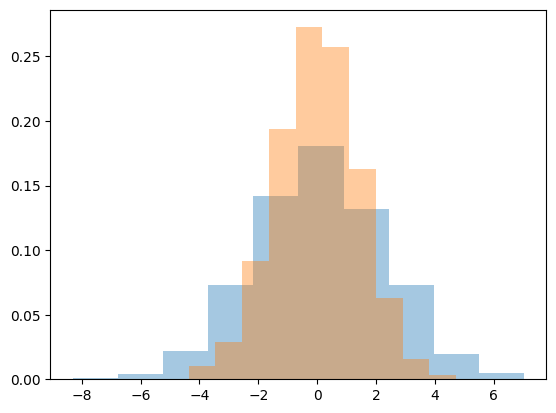

In [11]:
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.4)

<Axes: ylabel='Density'>

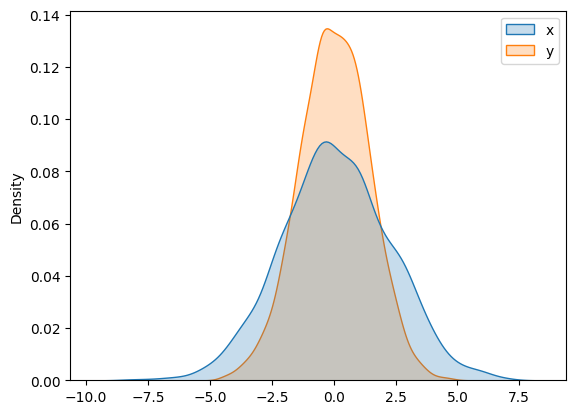

In [13]:
sns.kdeplot(data=data, fill=True)

<Axes: xlabel='x', ylabel='y'>

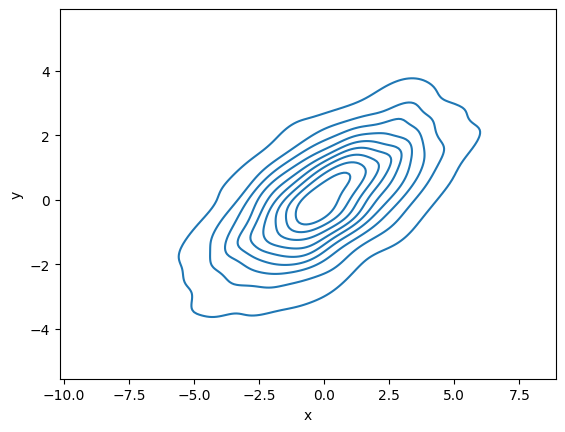

In [14]:
sns.kdeplot(data=data, x='x', y='y')

In [16]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


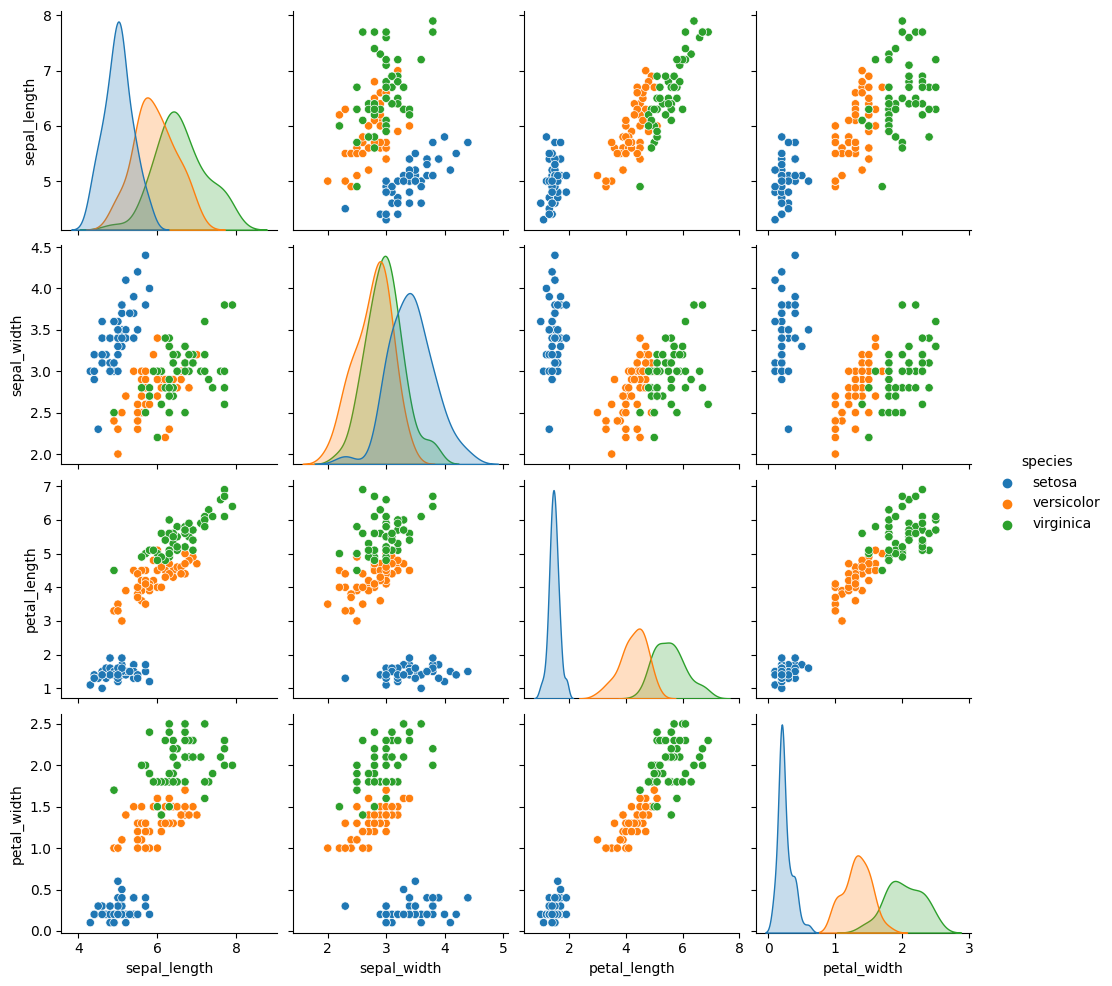

In [19]:
sns.pairplot(iris, hue='species', height=2.5)

### Faceted Histograms

In [20]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


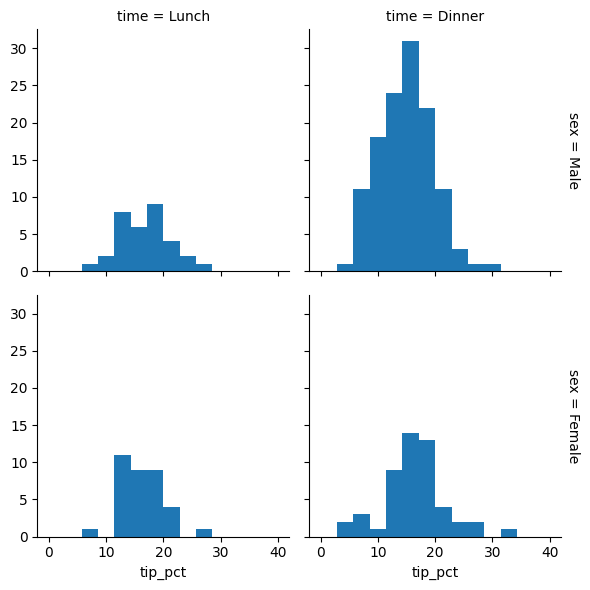

In [24]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15))

## Categorical Plots

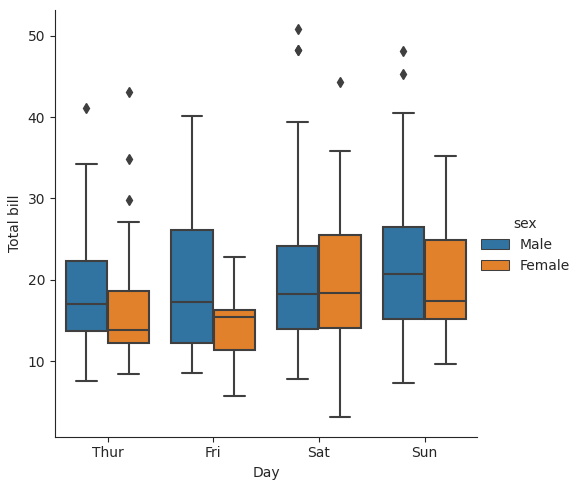

In [27]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x='day', y='total_bill', hue='sex', data=tips,
                    kind='box')
    g.set_axis_labels('Day', 'Total bill')

### Joint Distributions

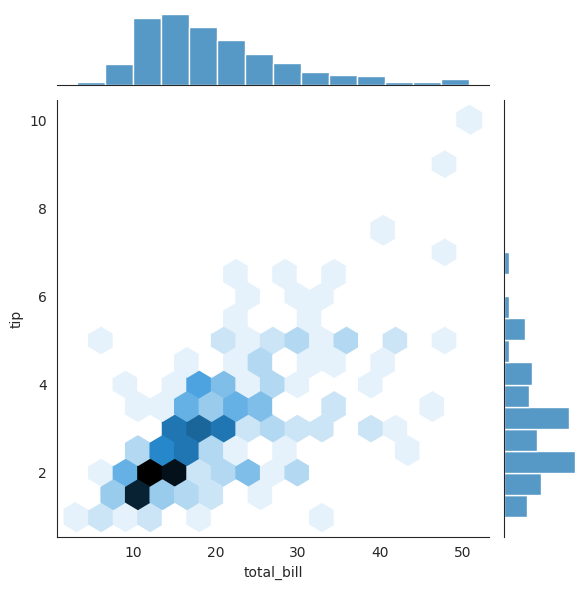

In [28]:
with sns.axes_style(style='white'):
    sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

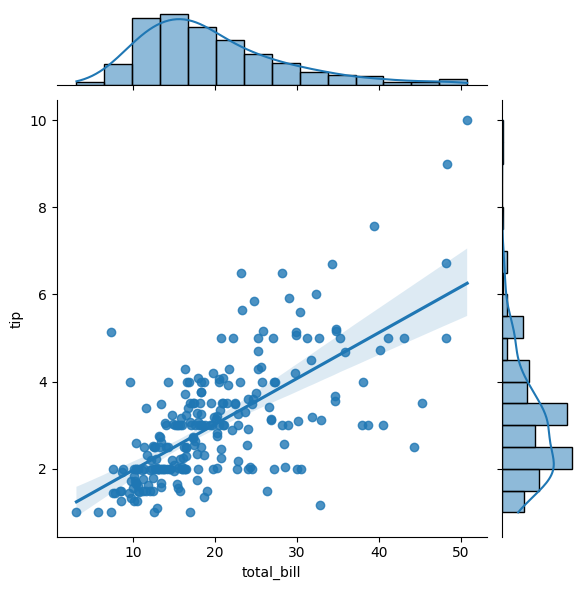

In [29]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

### Bar Plots

In [30]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


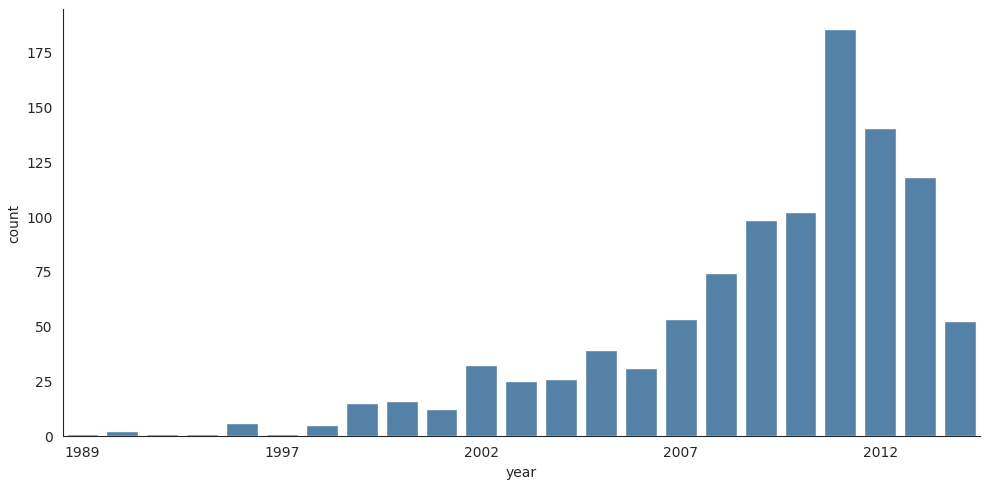

In [32]:
with sns.axes_style(style='white'):
    g = sns.catplot(x='year', data=planets, aspect=2,
                    kind='count', color='steelblue')
    g.set_xticklabels(step=5)

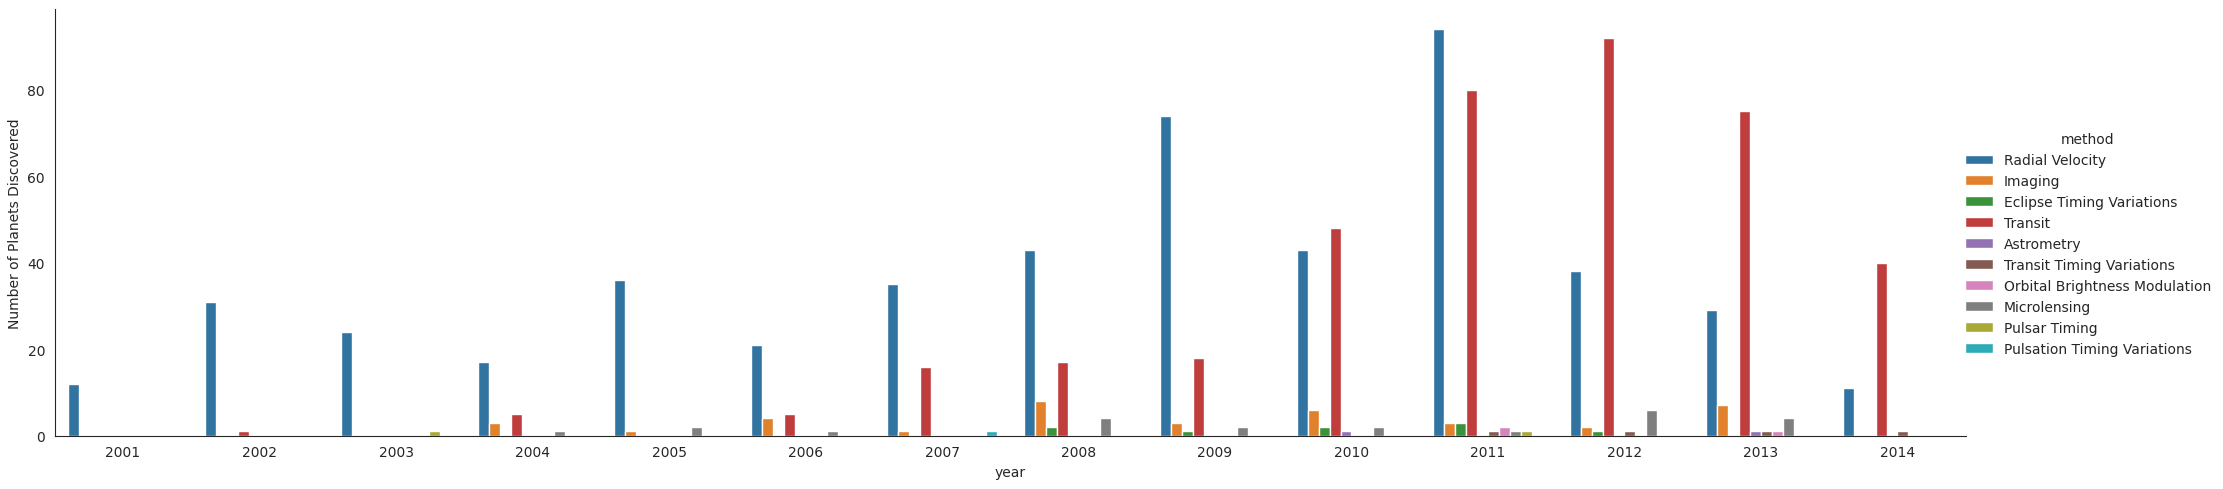

In [35]:
with sns.axes_style('white'):
    g = sns.catplot(x='year', data=planets, aspect=4, kind='count',
                    hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## Example: Exploring Marathon Finishing Times

In [37]:
data = pd.read_csv('data/marathon-data.csv')
data.sample(5)

,age,gender,split,final
27482,39,M,02:22:39,05:25:11
17844,47,M,01:42:54,04:41:10
37036,80,M,03:20:18,07:55:45
34434,31,W,02:31:04,06:22:45
568,40,M,01:24:40,02:53:06


In [38]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [46]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('data/marathon-data.csv', 
                   converters={'split': convert_time, 'final': convert_time})
data.sample(5)

,age,gender,split,final
185,23,M,0 days 01:18:46,0 days 02:39:56
14862,35,W,0 days 01:59:13,0 days 04:28:02
29991,38,W,0 days 02:08:01,0 days 05:39:02
22672,44,M,0 days 02:08:33,0 days 05:02:47
23488,36,M,0 days 02:00:29,0 days 05:06:33


In [47]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [60]:
data['split_sec'] = data['split'].dt.seconds
data['final_sec'] = data['final'].dt.seconds

In [61]:
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938,7731
1,32,M,0 days 01:06:26,0 days 02:09:28,3986,7768
2,31,M,0 days 01:06:49,0 days 02:10:42,4009,7842
3,38,M,0 days 01:06:16,0 days 02:13:45,3976,8025
4,31,M,0 days 01:06:32,0 days 02:13:59,3992,8039


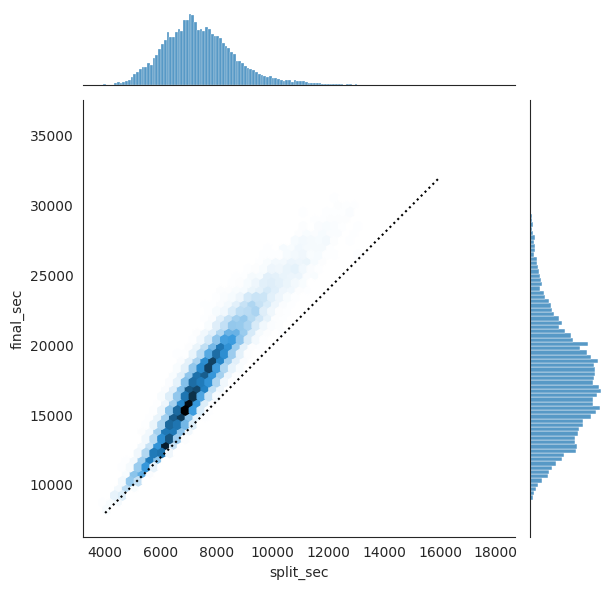

In [67]:
with sns.axes_style('white'):
    g = sns.jointplot(x='split_sec', y='final_sec', data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [68]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

In [78]:
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938,7731,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986,7768,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009,7842,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976,8025,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992,8039,0.006842


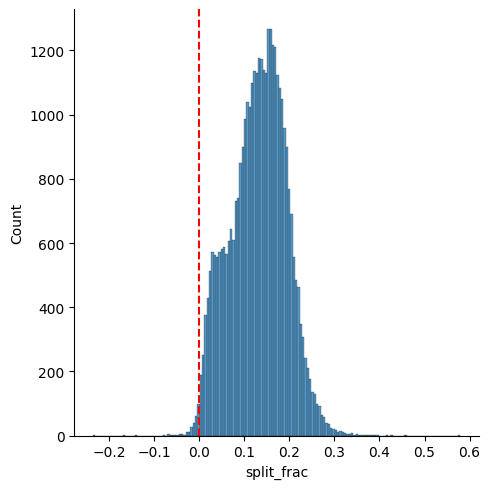

In [81]:
sns.displot(data['split_frac'], kde=False)
plt.axvline(0, color='r', linestyle='--')

In [82]:
sum(data['split_frac'] < 0)

251

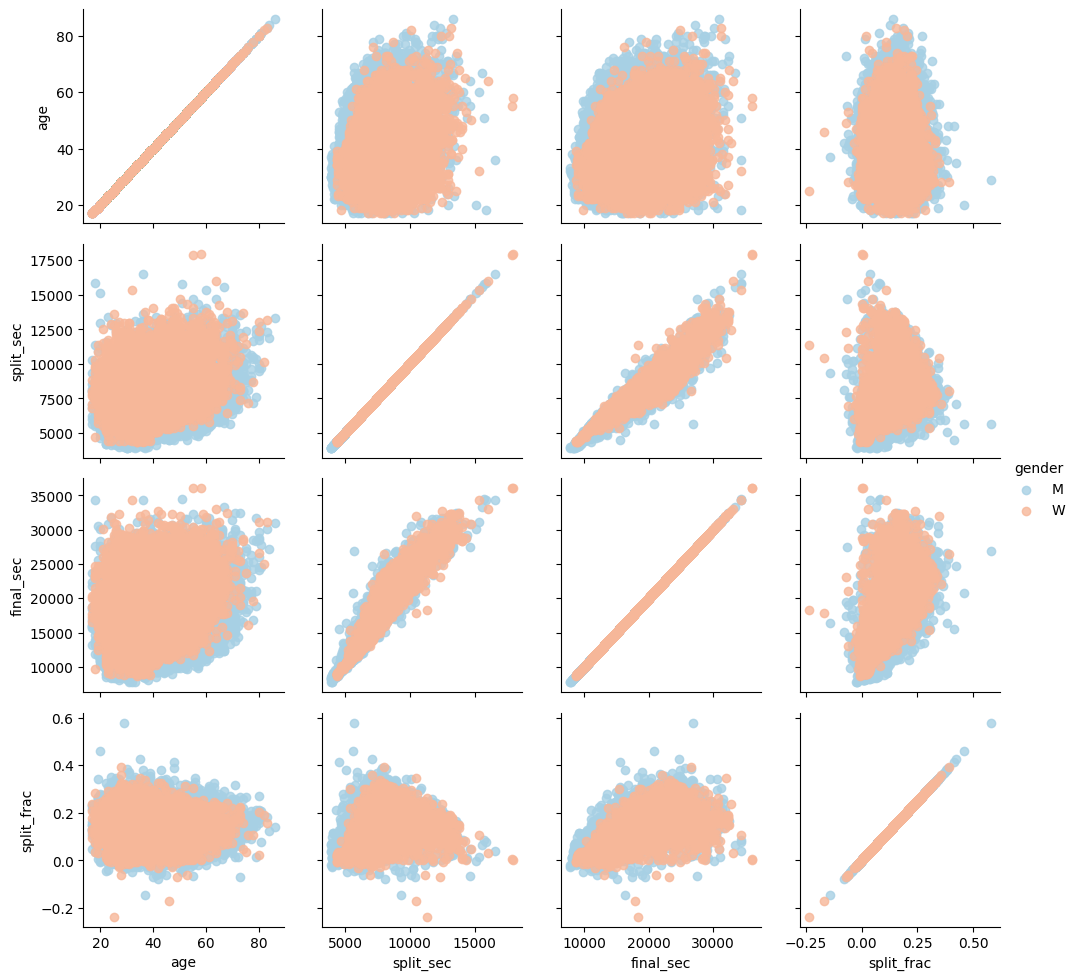

In [86]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=.8)
g.add_legend()

Text(0.5, 0, 'split_fraction')

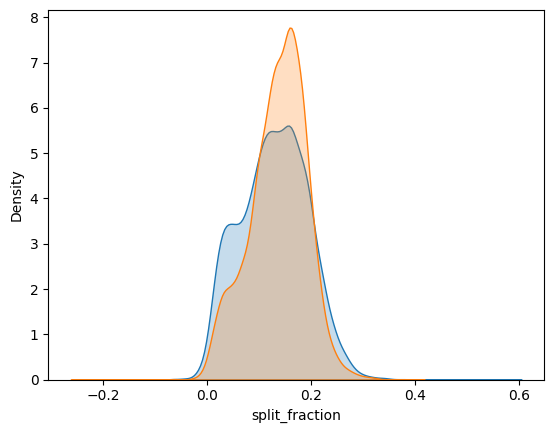

In [94]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', fill=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', fill=True)
plt.xlabel('split_fraction')

<Axes: xlabel='gender', ylabel='split_frac'>

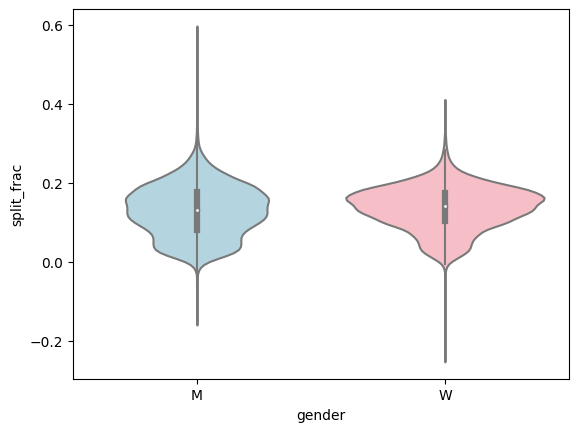

In [96]:
sns.violinplot(x='gender', y='split_frac', data=data,
               palette=['lightblue', 'lightpink'])

In [98]:
data['age_decade'] = data.age.map(lambda age: 10 * (age // 10))
data.sample(5)

,age,gender,split,final,split_sec,final_sec,split_frac,age_decade
8824,25,W,0 days 01:48:03,0 days 03:59:39,6483,14379,0.098268,20
31472,48,M,0 days 02:17:46,0 days 05:49:52,8266,20992,0.212462,40
21456,34,W,0 days 02:18:22,0 days 04:57:26,8302,17846,0.069595,30
34225,41,M,0 days 02:31:11,0 days 06:19:44,9071,22784,0.203739,40
22109,50,M,0 days 02:05:45,0 days 05:00:20,7545,18020,0.162597,50


In [99]:
men = (data['gender'] == 'M')
women = (data['gender'] == 'W')

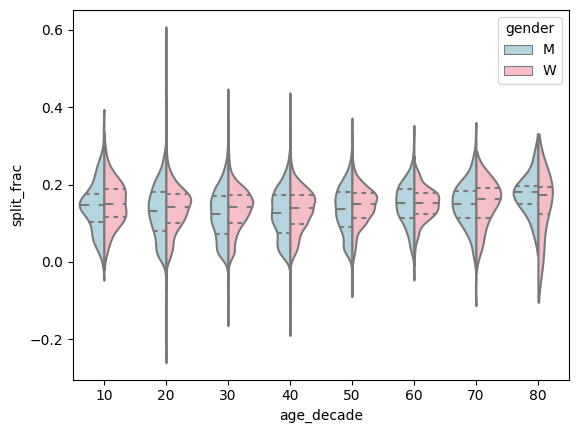

In [100]:
with sns.axes_style(style=None):
    sns.violinplot(x='age_decade', y='split_frac', hue='gender', data=data,
                   split=True, inner='quartile',
                   palette=['lightblue', 'lightpink'])

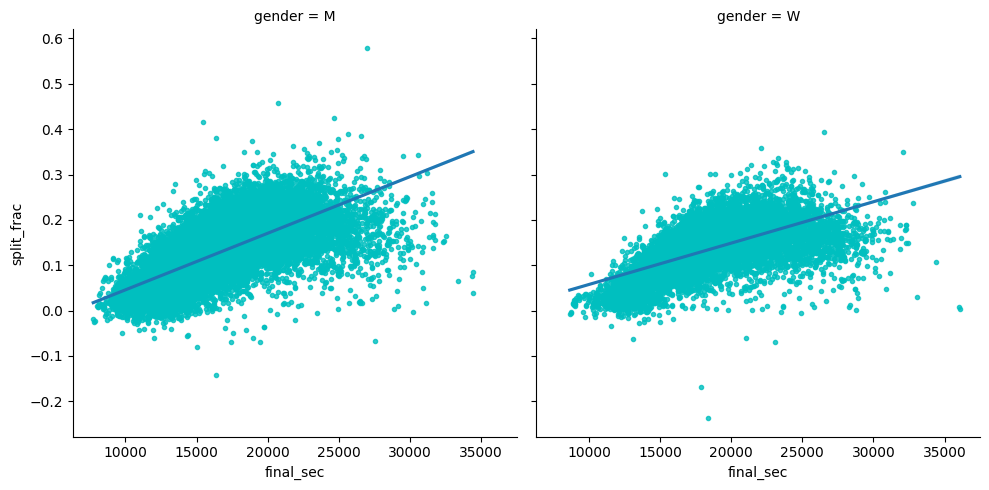

In [102]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
               markers='.', scatter_kws=dict(color='c'))

## 用Basemap可视化地理数据

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from PIL import Image, ImageTk
import PIL

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


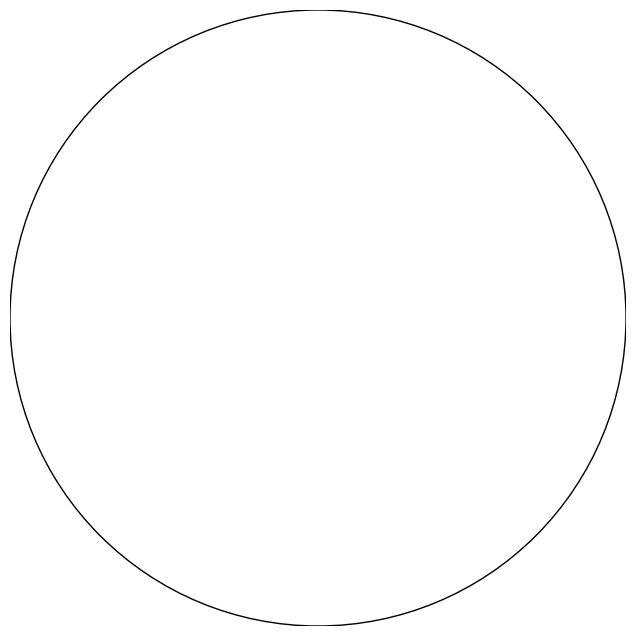

In [37]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho',
            resolution='l',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(2347268.222744085, 4518079.266407731, ' Seattle')

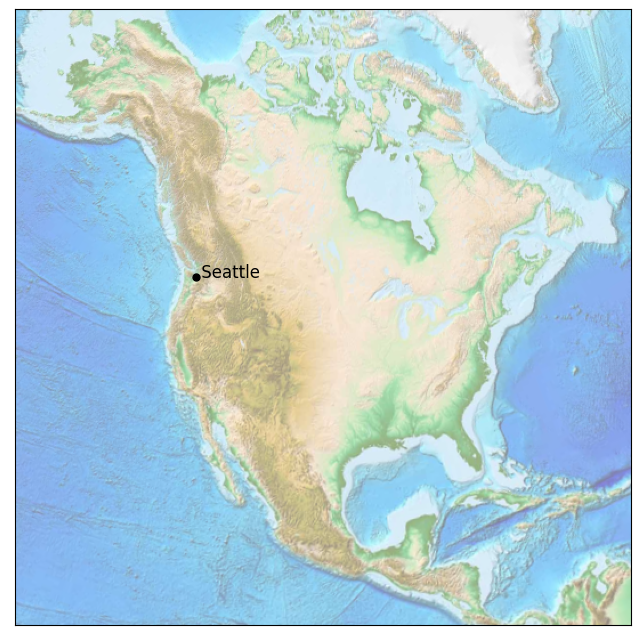

In [16]:
 fig = plt.figure(figsize=(8, 8))
 m = Basemap(projection='lcc', resolution=None,
             width=8E6, height=8E6,
             lat_0=45, lon_0=-100,)
 m.etopo(scale=0.5, alpha=0.5)
 x, y = m(-122.3, 47.6)
 plt.plot(x, y, 'ok', markersize=5)
 plt.text(x, y, ' Seattle', fontsize=12)

In [40]:
from itertools import chain

def draw_map(m, scale=.2):
    m.shadedrelief(scale=scale)
    
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawparallels(np.linspace(-180, 180, 13))
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    for line in all_lines:
        line.set(linestyle='-', alpha=.3, color='w')

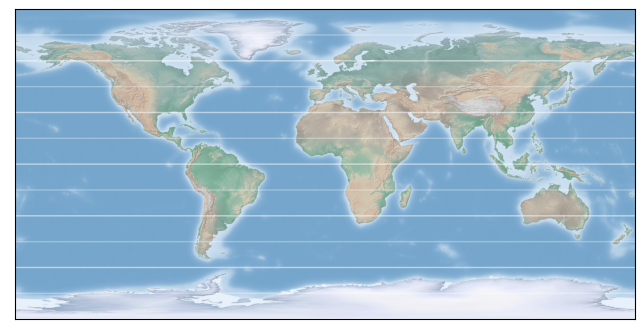

In [42]:
fig = plt.figure(figsize=(8, 8), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

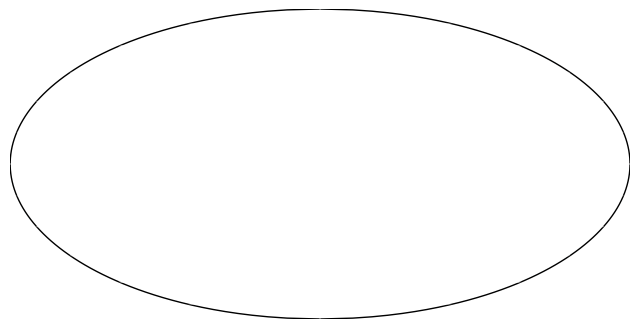

In [43]:
fig = plt.figure(figsize=(8, 8), edgecolor='w')
m = Basemap(projection='moll', resolution=None, lat_0=0, lon_0=0)
draw_map(m)

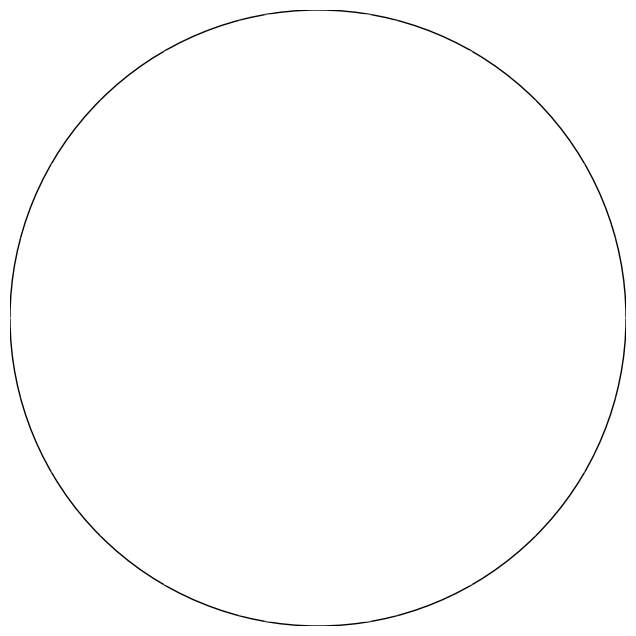

In [45]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

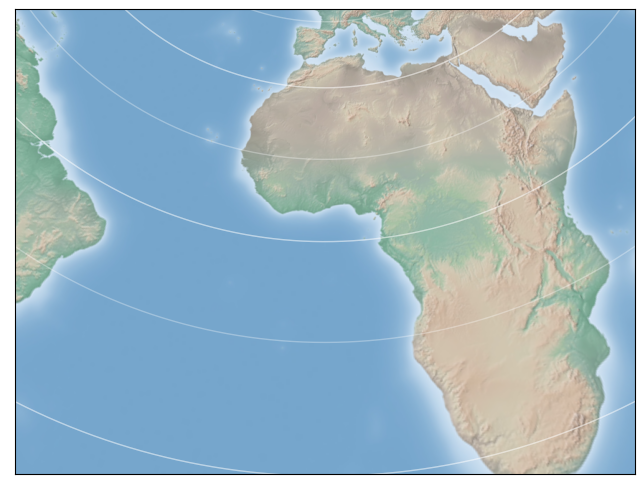

In [47]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None, 
            lon_0=0, lat_0=0, lat_1=45, lat_2=55,
            width=1.6e7, height=1.2e7)
draw_map(m)